Dataset 1: https://archive.ics.uci.edu/dataset/267/banknote+authentication

Dataset:

In [59]:
!pip install efficient_apriori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from efficient_apriori import apriori as ap

# for optimization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
df = pd.read_csv("C:/Users/nsupr/OneDrive/Documents/Ntu docs/Y4S1/CZ4032/Assignment 2/banknote+authentication/data_banknote_authentication.txt", header=None)
df.columns = ['variance','skewness','curtosis','entropy','class'] # Rename columns for clarity
true_labels = df['class'] # Ground truth
df.head()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [85]:
df = df.drop("class", axis=1) # Drop labels for clustering
df['variance'] = pd.cut(df['variance'], bins=3, labels=['low', 'medium', 'high'])
df['skewness'] = pd.cut(df['skewness'], bins=3, labels=['low', 'medium', 'high'])
df['curtosis'] = pd.cut(df['curtosis'], bins=3, labels=['low', 'medium', 'high'])
df['entropy'] = pd.cut(df['entropy'], bins=3, labels=['low', 'medium', 'high'])


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


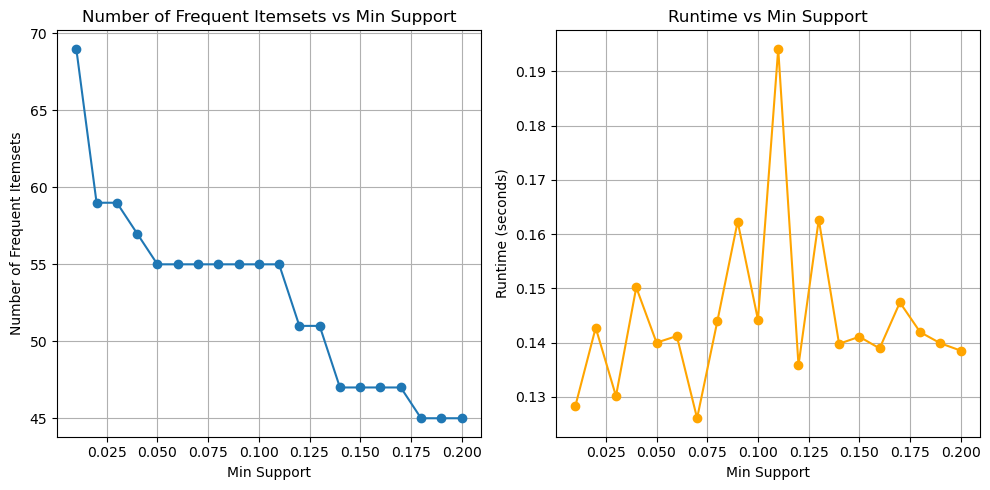

In [96]:
import time
import matplotlib.pyplot as plt

def data_generator(df):
    for _, row in df.dropna().iterrows():
        transaction = frozenset(str(item) for item in row)
        yield transaction

def count_frequent_itemsets(df, min_support):
    start_time = time.time()
    transactions = data_generator(df)
    itemsets, _ = ap(transactions, min_support=min_support, min_confidence=0.1, verbosity=0)
    end_time = time.time()
    runtime = end_time - start_time
    total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())
    return total_itemsets, runtime

# Vary the min_support parameter and count frequent itemsets with runtime
min_support_values = [i / 100 for i in range(1, 21)]  # Vary from 0.01 to 0.20
results = [count_frequent_itemsets(df, min_support) for min_support in min_support_values]

# Unpack results into separate lists
frequent_itemsets_count, runtimes = zip(*results)

# Plotting the graph for the number of frequent itemsets
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(min_support_values, frequent_itemsets_count, marker='o')
plt.xlabel('Min Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets vs Min Support')
plt.grid(True)

# Plotting the graph for runtime
plt.subplot(1, 2, 2)
plt.plot(min_support_values, runtimes, marker='o', color='orange')
plt.xlabel('Min Support')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Min Support')
plt.grid(True)

plt.tight_layout()
plt.show()

In [97]:
# Convert the columns to categorical
df = df.astype('category')
df_encoded = pd.get_dummies(df)

# Use one-hot encoding to convert categorical variables into binary format
item_names = df.columns.tolist()
baskets = [tuple(row.index[row == 1]) for _, row in df_encoded.iterrows()]

# Get frequent itemsets and rules using efficient_apriori
# min_support is reduced
itemsets, _ = ap(baskets, min_support=0.025)

# Extract frequent itemsets with support above a threshold
min_support = 0.1
frequent_itemsets = {itemset: support for length, items in itemsets.items() for itemset, support in items.items() if support >= min_support}

# Create a binary-encoded dataset based on frequent itemsets
encoded_dataset = pd.DataFrame(0, columns=[str(itemset) for itemset in frequent_itemsets.keys()], index=df_encoded.index)

for idx, basket in enumerate(baskets):
    for itemset in frequent_itemsets.keys():
        if set(itemset).issubset(basket):
            encoded_dataset.loc[idx, str(itemset)] = 1

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
display(encoded_dataset)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"('variance_high',)","('skewness_high',)","('curtosis_low',)","('entropy_high',)","('KMeansCluster_4',)","('AggCluster_3',)","('entropy_medium',)","('skewness_medium',)","('KMeansCluster_0',)","('AggCluster_0',)",...,"('AggCluster_1', 'KMeansCluster_1', 'curtosis_low', 'entropy_high', 'skewness_medium', 'variance_low')","('AggCluster_1', 'KMeansCluster_1', 'curtosis_medium', 'entropy_high', 'skewness_low', 'variance_medium')","('AggCluster_1', 'KMeansCluster_3', 'curtosis_low', 'entropy_low', 'skewness_high', 'variance_low')","('AggCluster_2', 'KMeansCluster_2', 'curtosis_low', 'entropy_high', 'skewness_medium', 'variance_medium')","('AggCluster_2', 'KMeansCluster_2', 'curtosis_low', 'entropy_medium', 'skewness_medium', 'variance_medium')","('AggCluster_3', 'KMeansCluster_4', 'curtosis_low', 'entropy_high', 'skewness_high', 'variance_high')","('AggCluster_3', 'KMeansCluster_4', 'curtosis_low', 'entropy_medium', 'skewness_high', 'variance_high')","('AggCluster_4', 'KMeansCluster_3', 'curtosis_low', 'entropy_high', 'skewness_high', 'variance_medium')","('AggCluster_4', 'KMeansCluster_3', 'curtosis_low', 'entropy_low', 'skewness_high', 'variance_medium')","('AggCluster_4', 'KMeansCluster_3', 'curtosis_low', 'entropy_medium', 'skewness_high', 'variance_medium')"
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1368,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1369,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature Reduction with PCA
The idea is to start with n_components = number of columns. Then select the number of components that add up to 1 variance_ratio.

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


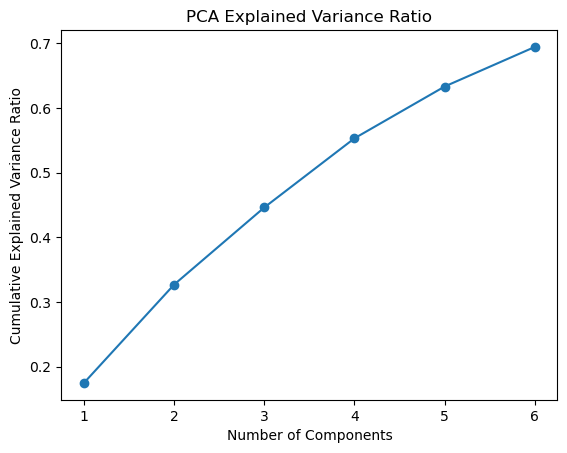

In [99]:
pca = PCA(n_components=6)
pca.fit(encoded_dataset)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()
pca_samples = pca.transform(encoded_dataset)

In [100]:
ps = pd.DataFrame(pca_samples)
ps.head()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5
0,-2.226546,-2.556843,4.526874,0.193215,0.299701,-1.589239
1,-2.410252,-3.530961,4.948580,0.212901,1.082468,0.442635
2,-2.172955,4.750072,1.254222,-2.394784,-3.502171,-0.191644
3,-2.410252,-3.530961,4.948580,0.212901,1.082468,0.442635
4,-1.517929,3.851092,-1.073113,0.403662,5.421916,0.029848


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ps)
scaled_data

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-0.74962276, -0.92327794,  1.8457988 ,  0.08320604,  0.14912524,
        -0.90457071],
       [-0.81147184, -1.27503248,  2.0177463 ,  0.09168372,  0.53861415,
         0.25194137],
       [-0.73157988,  1.71525458,  0.5113996 , -1.03129114, -1.7426098 ,
        -0.10908084],
       ...,
       [-0.30463506, -0.26831466, -0.4583037 ,  1.02616929, -0.59386726,
         0.86172295],
       [-0.30463506, -0.26831466, -0.4583037 ,  1.02616929, -0.59386726,
         0.86172295],
       [-0.34638682,  0.37128086, -0.32751622,  0.54908236,  0.28450601,
         0.30703497]])

In [102]:
pip install --upgrade scikit-learn threadpoolctl

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Requirement already up-to-date: scikit-learn in c:\users\nsupr\anaconda3\lib\site-packages (1.3.2)
Requirement already up-to-date: threadpoolctl in c:\users\nsupr\anaconda3\lib\site-packages (3.2.0)
Note: you may need to restart the kernel to use updated packages.


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: T

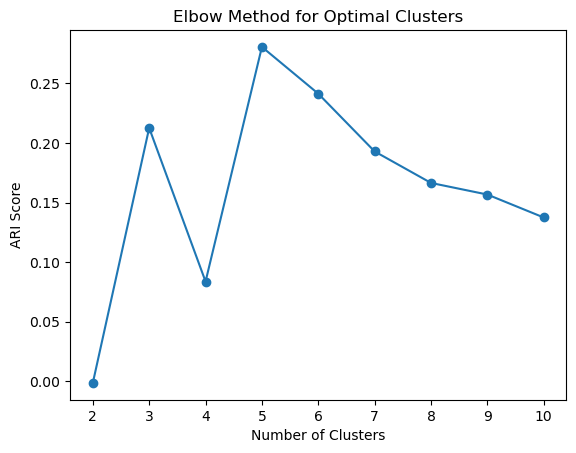

In [103]:
# Assume X is your data
ari_scores = []

# Try different values for n_clusters
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    ari = adjusted_rand_score(true_labels, clusters)
    ari_scores.append(ari)

# Plot the ARI scores against the number of clusters
plt.plot(range(2, 11), ari_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('ARI Score')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [104]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter=300 ,random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df['KMeansCluster'] = clusters

ari_kmeans = adjusted_rand_score(true_labels, df['KMeansCluster'])
nmi_kmeans = normalized_mutual_info_score(true_labels, df['KMeansCluster'])
fmi_kmeans = fowlkes_mallows_score(true_labels, df['KMeansCluster'])

print("KMeans Clustering Results:")
print("ARI:", ari_kmeans)
print("NMI:", nmi_kmeans)
print("FMI:", fmi_kmeans)

KMeans Clustering Results:
ARI: 0.28044999316318237
NMI: 0.34936202521429005
FMI: 0.5483083399730936


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
clusters = agg_clustering.fit_predict(ps)

# Add cluster labels to the original DataFrame
df['AggCluster'] = clusters

ari_agg = adjusted_rand_score(true_labels, df['AggCluster'])
nmi_agg = normalized_mutual_info_score(true_labels, df['AggCluster'])
fmi_agg = fowlkes_mallows_score(true_labels, df['AggCluster'])

print("\nOPTICS Clustering Results:")
print("ARI:", ari_agg)
print("NMI:", nmi_agg)
print("FMI:", fmi_agg)


OPTICS Clustering Results:
ARI: 0.26195147080740294
NMI: 0.3481679113921633
FMI: 0.5287090128416149


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset 2: https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes

In [ ]:
# We now repeat this with another dataset (linked above)

In [118]:
df2 = pd.read_csv("C:/Users/nsupr/OneDrive/Documents/Ntu docs/Y4S1/CZ4032/Assignment 2/vehicle.csv")
display(df2.head())

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO',Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [119]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2['Class_encoded'] = label_encoder.fit_transform(df2['Class'])

true_labels2 = df2['Class_encoded']

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Shows how each feature gets encoded. We encode the classes as numbers here for simplicity instead of using one-hot encoding
print(category_mapping)

df2 = df2.drop(['Class', 'Class_encoded'], axis=1) # Drop ground truth labels for clustering
display(df2.head())

{'bus': 0, 'opel': 1, 'saab': 2, 'van': 3}


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In the cell below, we binarize our dataframe to make it suitable for the apriori algorithm. We do this by assigning a value of 1 to a column in a specific row if the value of the column in that row is higher than the average value of the column and 0 if it is lower than the average value of the column. This serves as an indicator function of whether or not each column value is present in a "basket", i.e; the columns are the items and the rows are the baskets.

In [120]:
column_averages = df2.mean()

for col in df2.columns:
    df2[col] = (df2[col] >= column_averages[col]).astype(int)

display(df2)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1
2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1
3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1
4,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0
842,0,1,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1
843,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1
844,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


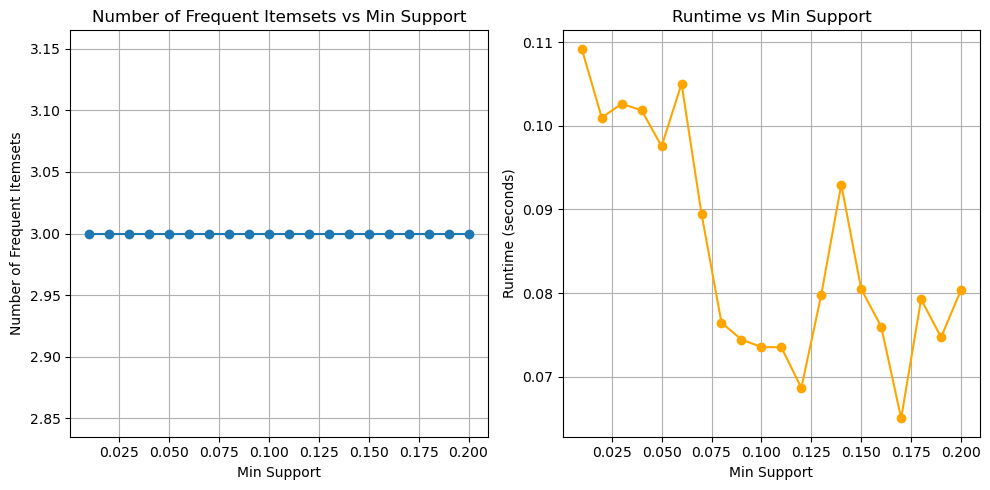

In [122]:
import time
import matplotlib.pyplot as plt

def data_generator(df):
    for _, row in df.dropna().iterrows():
        transaction = frozenset(str(item) for item in row)
        yield transaction

def count_frequent_itemsets(df, min_support):
    start_time = time.time()
    transactions = data_generator(df)
    itemsets, _ = ap(transactions, min_support=min_support, min_confidence=0.1, verbosity=0)
    end_time = time.time()
    runtime = end_time - start_time
    total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())
    return total_itemsets, runtime

# Vary the min_support parameter and count frequent itemsets with runtime
min_support_values = [i / 100 for i in range(1, 21)]  # Vary from 0.01 to 0.20
results = [count_frequent_itemsets(df2, min_support) for min_support in min_support_values]

# Unpack results into separate lists
frequent_itemsets_count, runtimes = zip(*results)

# Plotting the graph for the number of frequent itemsets
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(min_support_values, frequent_itemsets_count, marker='o')
plt.xlabel('Min Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets vs Min Support')
plt.grid(True)

# Plotting the graph for runtime
plt.subplot(1, 2, 2)
plt.plot(min_support_values, runtimes, marker='o', color='orange')
plt.xlabel('Min Support')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Min Support')
plt.grid(True)

plt.tight_layout()
plt.show()

In [123]:
baskets = [set(df2.columns[df2.loc[idx] == 1]) for idx in range(len(df2))]
itemsets, _ = ap(baskets, min_support=0.170)

min_support = 0.1
frequent_itemsets_dict = {itemset: support for length, items in itemsets.items() for itemset, support in items.items() if support >= min_support}

# Create a binary-encoded dataset based on frequent itemsets
encoded_dataset2 = pd.DataFrame(0, columns=[str(itemset) for itemset in frequent_itemsets_dict.keys()], index=df2.index)

for idx, basket in enumerate(baskets):
    for itemset, support in frequent_itemsets_dict.items():
        if all(item in basket for item in itemset):
            encoded_dataset2.loc[idx, str(itemset)] = 1

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
display(encoded_dataset2)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"(""'PR.AXIS ASPECT RATIO'"",)","('ELONGATEDNESS',)","('COMPACTNESS',)","('CIRCULARITY',)","(""'KURTOSIS ABOUT_MAJOR'"",)","(""'HOLLOWS RATIO'"",)","(""'SCALED RADIUS OF GYRATION'"",)","(""'DISTANCE CIRCULARITY'"",)","(""'MAX.LENGTH RECTANGULARITY'"",)","(""'RADIUS RATIO'"",)",...,"(""'MAX.LENGTH RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY', 'COMPACTNESS')","(""'PR.AXIS ASPECT RATIO'"", ""'PR.AXIS RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY')","(""'PR.AXIS ASPECT RATIO'"", ""'PR.AXIS RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'COMPACTNESS')","(""'PR.AXIS ASPECT RATIO'"", ""'PR.AXIS RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", 'CIRCULARITY', 'COMPACTNESS')","(""'PR.AXIS ASPECT RATIO'"", ""'PR.AXIS RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY', 'COMPACTNESS')","(""'PR.AXIS ASPECT RATIO'"", ""'PR.AXIS RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY', 'COMPACTNESS')","(""'PR.AXIS ASPECT RATIO'"", ""'PR.AXIS RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY', 'COMPACTNESS')","(""'PR.AXIS ASPECT RATIO'"", ""'PR.AXIS RECTANGULARITY'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY', 'COMPACTNESS')","(""'PR.AXIS ASPECT RATIO'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY', 'COMPACTNESS')","(""'PR.AXIS RECTANGULARITY'"", ""'RADIUS RATIO'"", ""'SCALED RADIUS OF GYRATION'"", ""'SCALED VARIANCE_MAJOR'"", ""'SCALED VARIANCE_MINOR'"", ""'SCATTER RATIO'"", 'CIRCULARITY', 'COMPACTNESS')"
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
842,1,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
843,1,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
844,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


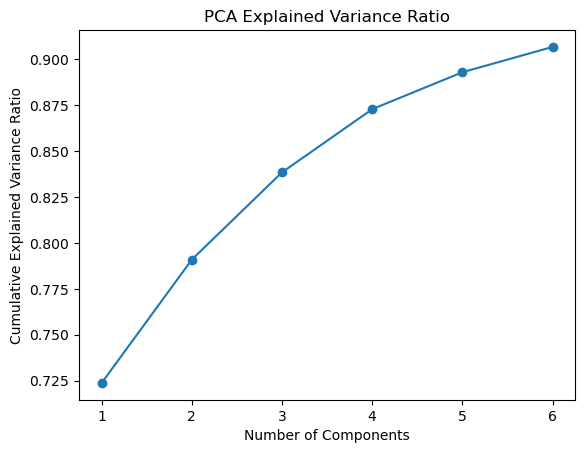

In [126]:
pca = PCA(n_components=6)
pca.fit(encoded_dataset2)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()
pca_samples = pca.transform(encoded_dataset2)

In [127]:
ps = pd.DataFrame(pca_samples)
ps.head()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5
0,-11.525961,-0.067068,-2.062524,-3.787827,-0.294664,-0.865254
1,-16.433828,-1.365174,-0.974468,-1.403142,-0.092214,-0.080346
2,51.036165,4.894772,-2.489066,-11.875266,-0.452205,-2.733057
3,-16.559981,-1.133893,-0.925430,-1.743018,-0.024225,-0.368159
4,-16.256935,-0.797275,-0.615563,-1.890986,-0.057937,-0.054110


In [128]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaled_data2 = scaler2.fit_transform(encoded_dataset2)
scaled_data2

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 1.03366322,  0.85858391,  1.09165464, ..., -0.45291081,
        -0.45291081, -0.61104552],
       [-0.96743308,  0.85858391, -0.91604063, ..., -0.45291081,
        -0.45291081, -0.61104552],
       [ 1.03366322, -1.16470853,  1.09165464, ...,  2.20794022,
         2.20794022,  1.6365393 ],
       ...,
       [ 1.03366322, -1.16470853,  1.09165464, ...,  2.20794022,
         2.20794022,  1.6365393 ],
       [-0.96743308,  0.85858391, -0.91604063, ..., -0.45291081,
        -0.45291081, -0.61104552],
       [-0.96743308,  0.85858391, -0.91604063, ..., -0.45291081,
        -0.45291081, -0.61104552]])

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: T

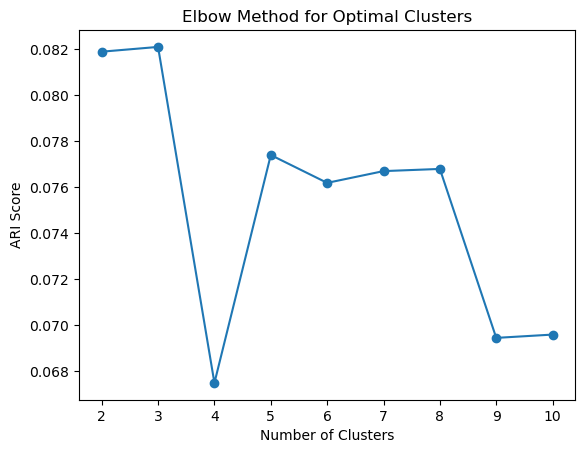

In [130]:
ari_scores = []

# Try different values for n_clusters
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(scaled_data2)
    ari = adjusted_rand_score(true_labels2, clusters)
    ari_scores.append(ari)

# Plot the ARI scores against the number of clusters
plt.plot(range(2, 11), ari_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('ARI Score')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [131]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters2 = kmeans.fit_predict(scaled_data2)

# Add cluster labels to the original DataFrame
df2['KMeansCluster'] = clusters2

ari_kmeans = adjusted_rand_score(true_labels2, df2['KMeansCluster'])
nmi_kmeans = normalized_mutual_info_score(true_labels2, df2['KMeansCluster'])
fmi_kmeans = fowlkes_mallows_score(true_labels2, df2['KMeansCluster'])

print("KMeans Clustering Results:")
print("ARI:", ari_kmeans)
print("NMI:", nmi_kmeans)
print("FMI:", fmi_kmeans)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\nsupr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Clustering Results:
ARI: 0.08209342873736296
NMI: 0.1877608433969431
FMI: 0.41813418195164515


In [132]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters2 = agg_clustering.fit_predict(scaled_data2)

# Add cluster labels to the original DataFrame
df2['AggCluster'] = clusters2

ari_agg = adjusted_rand_score(true_labels2, df2['AggCluster'])
nmi_agg = normalized_mutual_info_score(true_labels2, df2['AggCluster'])
fmi_agg = fowlkes_mallows_score(true_labels2, df2['AggCluster'])

print("\nOPTICS Clustering Results:")
print("ARI:", ari_agg)
print("NMI:", nmi_agg)
print("FMI:", fmi_agg)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



OPTICS Clustering Results:
ARI: 0.05749154954110111
NMI: 0.16407042695692584
FMI: 0.45699448775951185
